In [1]:
#Read DATA
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

def clean_my_df(df):

    numeric_features = df[numerical_data]
    categorical_features = df[categorical_data]

    for col_name in categorical_features.columns :
        categorical_features[col_name] = categorical_features[col_name].astype("category",
                                        categories=pd.unique(categorical_features[col_name].values.ravel()))
        
        data_oneHot = pd.get_dummies(categorical_features[col_name],prefix = col_name) # One hot encoding
        numeric_features = pd.concat([numeric_features,data_oneHot],axis = 1)

    return numeric_features

categorical_data = []
numerical_data = []

for i in open("dataDict").read().strip().split("\n") :
    
    if i.split("\t")[2].strip() == "Continuous" :
        numerical_data.append(i.split("\t")[0])
    else :
        categorical_data.append(i.split("\t")[0])

train_data = pd.read_excel("Health_care_Dataset_for_probelm.xlsx.xlsx", sheetname="Training Data")

labels = train_data["Lung_Cancer"]
train_data.drop("Lung_Cancer",axis = 1, inplace = True)
train_data.drop("Patient_ID",axis = 1,inplace=True)

features = clean_my_df(train_data)

eval_data = pd.read_excel("Health_care_Dataset_for_probelm.xlsx.xlsx", sheetname="Evaluation Data")
eval_data.drop("Lung_Cancer",axis = 1, inplace = True)
eval_data.drop("Patient_ID",axis = 1,inplace=True)

test_features = clean_my_df(eval_data)

/home/devaraj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
features.corr()

,Factor2,Factor3,Factor4,Factor6,DiseaseHis1Times,DiseaseHis2Times,DiseaseHis3Times,DiseaseHis6,LungFunct1,LungFunct2,...,Disease5_1.0,Disease5Treat_0,Disease5Treat_1,Disease6_0.0,Disease6_0.333333333,Disease6_1.0,Disease6Treat_0,Disease6Treat_1,Disease7_0,Disease7_1
Factor2,1.000000,0.421422,0.885999,-0.085308,0.001095,-0.019813,0.000741,-0.015942,0.139489,-0.169990,...,0.027327,0.167835,-0.167835,0.087280,-0.070431,-0.026468,0.059587,-0.059587,-0.001684,0.001684
Factor3,0.421422,1.000000,-0.035170,-0.030558,0.021459,-0.050906,-0.023468,-0.028552,-0.037448,-0.070971,...,0.004188,0.049572,-0.049572,0.047126,-0.044945,-0.001904,0.048476,-0.048476,-0.033167,0.033167
Factor4,0.885999,-0.035170,1.000000,-0.083032,-0.005281,0.004972,0.014176,-0.001271,0.173269,-0.152419,...,0.030301,0.159834,-0.159834,0.074123,-0.056038,-0.029240,0.041966,-0.041966,0.010249,-0.010249
Factor6,-0.085308,-0.030558,-0.083032,1.000000,-0.071688,0.022218,-0.019111,0.020533,-0.187668,-0.015794,...,-0.027303,-0.184266,0.184266,-0.224036,0.238858,-0.036056,-0.223775,0.223775,0.087723,-0.087723
DiseaseHis1Times,0.001095,0.021459,-0.005281,-0.071688,1.000000,0.529115,0.590403,0.501609,-0.170636,-0.074975,...,0.021568,-0.146628,0.146628,-0.199295,0.222759,-0.050482,-0.242982,0.242982,-0.060884,0.060884
DiseaseHis2Times,-0.019813,-0.050906,0.004972,0.022218,0.529115,1.000000,0.669744,0.690657,-0.209285,-0.086144,...,0.031372,-0.210609,0.210609,-0.254128,0.256623,-0.015258,-0.276191,0.276191,-0.072781,0.072781
DiseaseHis3Times,0.000741,-0.023468,0.014176,-0.019111,0.590403,0.669744,1.000000,0.643191,-0.236941,-0.120966,...,-0.002008,-0.220567,0.220567,-0.250389,0.278230,-0.060492,-0.299705,0.299705,-0.082646,0.082646
DiseaseHis6,-0.015942,-0.028552,-0.001271,0.020533,0.501609,0.690657,0.643191,1.000000,-0.231477,-0.099722,...,0.010590,-0.264073,0.264073,-0.298942,0.313000,-0.037869,-0.335078,0.335078,-0.120231,0.120231
LungFunct1,0.139489,-0.037448,0.173269,-0.187668,-0.170636,-0.209285,-0.236941,-0.231477,1.000000,0.565676,...,-0.036531,0.467957,-0.467957,0.492008,-0.515596,0.063133,0.536652,-0.536652,0.125375,-0.125375
LungFunct2,-0.169990,-0.070971,-0.152419,-0.015794,-0.074975,-0.086144,-0.120966,-0.099722,0.565676,1.000000,...,-0.032278,0.097930,-0.097930,0.146770,-0.175716,0.058070,0.197543,-0.197543,0.034403,-0.034403


In [3]:
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import *
from sklearn.metrics import *
from sklearn.grid_search import GridSearchCV

def gridSearch(X):
    logreg_model = LogisticRegression()

    parameters = {
                    'penalty' : ['l2','l1'],
                    'dual' : [False],
                    'C' : [0.1,0.6,0.01,1],
                    'fit_intercept' : [True], 
                    'intercept_scaling' : [0.1,0.5,1,5], 
                    'class_weight' : ['balanced']
                  }

    clf = GridSearchCV(logreg_model,parameters,n_jobs=4,cv=StratifiedKFold(labels,n_folds=4, shuffle=True),
                       scoring='roc_auc',refit=True)
    clf.fit(X,labels)
    best_parameters,score,filler = max(clf.grid_scores_,key=lambda x:x[1])
    return best_parameters,score

In [4]:
# Dimensionality reduction by PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
reduced_features = pca.fit_transform(features)
test_reduced_features = pca.fit_transform(test_features)

best_parameters_pca,score = gridSearch(reduced_features)
print "Score : ",score,"\n"
pprint(best_parameters_pca)

Score :  0.766694673425 

{'C': 0.01,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 0.1,
 'penalty': 'l1'}


In [5]:
# Using All features
best_parameters_all,score = gridSearch(features)
print "Score : ",score,"\n"
pprint(best_parameters_all)


Score :  0.761341020718 

{'C': 0.01,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 0.1,
 'penalty': 'l2'}


In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(reduced_features,labels, 
                                                     test_size=0.5, random_state=42,stratify=labels)

logReg = LogisticRegression().set_params(**best_parameters_pca).fit(X_train,y_train)
pred = logReg.predict(X_test)
print(classification_report(y_test,pred))


             precision    recall  f1-score   support

          0       0.95      0.55      0.69       607
          1       0.20      0.78      0.32        88

avg / total       0.85      0.58      0.65       695



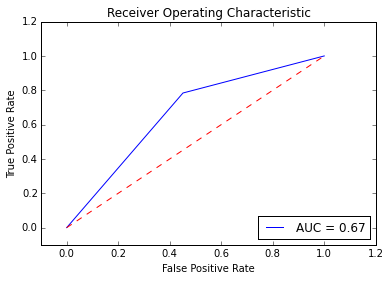

In [8]:
from sklearn.metrics import roc_curve, auc

actual = y_test
predictions = pred

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
logReg = LogisticRegression().set_params(**best_parameters_pca).fit(reduced_features,labels)
pred = logReg.predict_proba(test_reduced_features)
pd.DataFrame(pred).to_csv("result_logReg.csv",index=False)